Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0


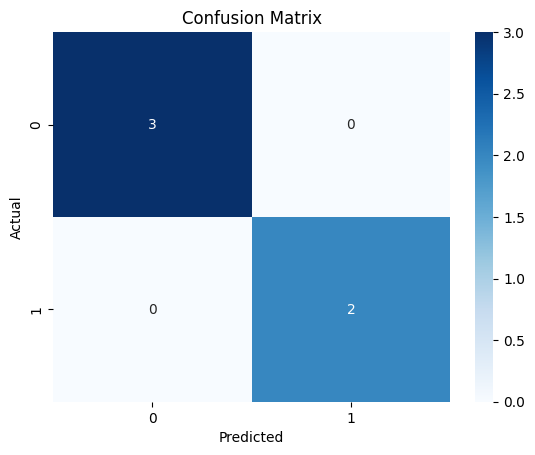

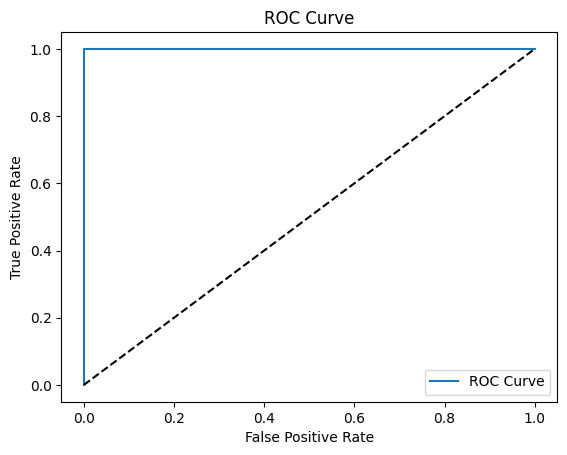


Imbalanced Dataset:
Accuracy: 0.8
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.8125


C:\Users\singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

X = np.array([[2, 50], [4, 60], [6, 65], [8, 80], [10, 85]])
y = np.array([0, 0, 0, 1, 1])
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

model = LogisticRegression()
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)
y_proba = model.predict_proba(X_scaled)[:, 1]

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))
print("AUC:", roc_auc_score(y, y_proba))

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fpr, tpr, _ = roc_curve(y, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

X_imb = np.array([[2, 50], [4, 60], [6, 65], [8, 80], [10, 85], [3, 55], [5, 58], [7, 62], [9, 78], [11, 90]])
y_imb = np.array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
X_scaled_imb = (X_imb - X_imb.mean(axis=0)) / X_imb.std(axis=0)

model_imb = LogisticRegression()
model_imb.fit(X_scaled_imb, y_imb)

y_pred_imb = model_imb.predict(X_scaled_imb)
y_proba_imb = model_imb.predict_proba(X_scaled_imb)[:, 1]

print("\nImbalanced Dataset:")
print("Accuracy:", accuracy_score(y_imb, y_pred_imb))
print("Precision:", precision_score(y_imb, y_pred_imb))
print("Recall:", recall_score(y_imb, y_pred_imb))
print("F1 Score:", f1_score(y_imb, y_pred_imb))
print("AUC:", roc_auc_score(y_imb, y_proba_imb))